# To verify if there is enough disparity between the first and last image

In [ ]:
from PIL import Image

# Open the two images
image1 = Image.open('/content/gal1.png')
image2 = Image.open('/content/gal3.png')

# Get the modes of the images
mode1 = image1.mode
mode2 = image2.mode

# Convert the images to the same mode
if mode1 != mode2:
    if mode1 == 'RGBA':
        # If image1 has an alpha channel, convert it to RGB
        image1 = image1.convert('RGB')
    else:
        # Otherwise, convert it to mode2
        image1 = image1.convert(mode2)

    if mode2 == 'RGBA':
        # If image2 has an alpha channel, convert it to RGB
        image2 = image2.convert('RGB')
    else:
        # Otherwise, convert it to mode1
        image2 = image2.convert(mode1)

# The two images are now in the same mode


# Getting the image size

In [ ]:
from PIL import Image

# Open the first image and get its size
image1 = Image.open('/content/t11.jpg')
width1, height1 = image1.size

# Open the second image and get its size
image2 = Image.open('/content/t22.jpg')
width2, height2 = image2.size



# Print the sizes of the two images
print("Size of Image 1: {}x{}".format(width1, height1))
print("Size of Image 2: {}x{}".format(width2, height2))


Size of Image 1: 195x195
Size of Image 2: 195x195


# Resizing to the larger frame

In [ ]:
from PIL import Image

# Open the two images
image1 = Image.open('/content/gal1_1.png')
image2 = Image.open('/content/gal1_3.png')

# Get the sizes of the images
size1 = image1.size
size2 = image2.size

# Resize the images to the same size
if size1 != size2:
    # Choose the larger size as the target size
    target_size = (max(size1[0], size2[0]), max(size1[1], size2[1]))

    # Resize image1 to the target size
    image1 = image1.resize(target_size)

    # Resize image2 to the target size
    image2 = image2.resize(target_size)

# The two images are now the same size

# Open the first image and get its size
width1, height1 = image1.size

# Open the second image and get its size
width2, height2 = image2.size

# Print the sizes of the two images
print("Size of Image 1: {}x{}".format(width1, height1))
print("Size of Image 2: {}x{}".format(width2, height2))


Size of Image 1: 195x105
Size of Image 2: 195x105


# Checking if stereoscopic vision is possible or not

In [ ]:
import cv2

# Load the two images
# imgL = cv2.imread('gal1.png')
# imgR = cv2.imread('gal3.png')

# Convert the images to grayscale
# grayL = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
# grayR = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

import cv2
import numpy as np

# Convert the images to grayscale
grayL = cv2.cvtColor(np.float32(image1), cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(np.float32(image2), cv2.COLOR_BGR2GRAY)

# Convert the images to grayscale with 8-bit unsigned integer format
grayL = cv2.cvtColor(np.float32(image1), cv2.COLOR_BGR2GRAY)
grayL = cv2.convertScaleAbs(grayL)
grayR = cv2.cvtColor(np.float32(image2), cv2.COLOR_BGR2GRAY)
grayR = cv2.convertScaleAbs(grayR)


# Compute the disparity map using the block matching algorithm
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
disparity = stereo.compute(grayL, grayR)

# Compute the depth map from the disparity map
depth = cv2.convertScaleAbs(disparity)

# Compute the average depth of the scene
avg_depth = cv2.mean(depth)[0]

# Check if the average depth is within a suitable range
if avg_depth > 10 and avg_depth < 100:
    print("Stereoscopic vision possible.")
else:
    print("Insufficient disparity for stereoscopic vision.")

Stereoscopic vision possible.


# Code for finding out the centroid of the image

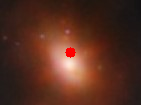

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read image and convert to grayscale
img = cv2.imread('/content/ins1_gal2.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold image to separate object from background
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroid of the largest contour
max_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour
M = cv2.moments(max_contour)
x_c = int(M["m10"] / M["m00"])
y_c = int(M["m01"] / M["m00"])

# Draw centroid on image and display
cv2.circle(img, (x_c, y_c), 5, (0, 0, 255), -1)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
from PIL import Image

# Open the image file
img = Image.open("/content/resized2_image.jpg")

# Convert the image to RGB mode
img = img.convert("RGB")

# Resize the image to 200x201
resized_img = img.resize((200, 201))

# Save the resized image as a JPEG file
resized_img.save("test2.jpg")


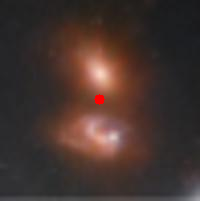

In [ ]:
import cv2
from google.colab.patches import cv2_imshow


# Read image and convert to grayscale
img = cv2.imread('/content/resized2_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold image to separate object from background
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroid of the largest contour
max_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour
M = cv2.moments(max_contour)
x_c = int(M["m10"] / M["m00"])
y_c = int(M["m01"] / M["m00"])

# Draw centroid on image and display
cv2.circle(img, (x_c, y_c), 5, (0, 0, 255), -1)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()



In [ ]:
from PIL import Image

# Open the image file
img = Image.open("/content/real_gl3.png")

# Convert the image to RGB mode
img = img.convert("RGB")

# Resize the image to 200x201
resized_img = img.resize((200, 201))

# Save the resized image as a JPEG file
resized_img.save("resized3_image.jpg")

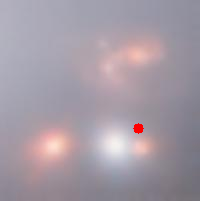

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

# Read image and convert to grayscale
img = cv2.imread('/content/resized3_image.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Threshold image to separate object from background
_, thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# Find contours in the image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate centroid of the largest contour
max_area = 0
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour
M = cv2.moments(max_contour)
x_c = int(M["m10"] / M["m00"])
y_c = int(M["m01"] / M["m00"])

# Draw centroid on image and display
cv2.circle(img, (x_c, y_c), 5, (0, 0, 255), -1)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()


To find the coordinate for the red dot in image

Red dot at (x, y): 57 166
Red dot at (x, y): 128 150
Red dot at (x, y): 70 121


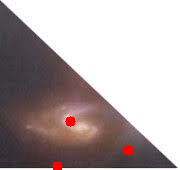

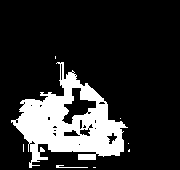

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/new1 (1).jpg')

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the lower and upper thresholds for red color
lower_red = np.array([0, 50, 50])   # Adjust these values based on your specific red color
upper_red = np.array([10, 255, 255])

# Threshold the image to get the red regions
mask = cv2.inRange(hsv, lower_red, upper_red)

# Find contours in the binary mask
contours, hierarchy = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Loop through the contours and find the centroids of the red dots
for contour in contours:
    # Find the moments of the contour
    M = cv2.moments(contour)

    # Check if the moment has a non-zero area
    if M["m00"] != 0:
        # Calculate the centroid coordinates
        cX = int(M["m10"] / M["m00"])
        cY = int(M["m01"] / M["m00"])

        # Draw a circle at the centroid of the red dot
        cv2.circle(image, (cX, cY), 5, (0, 0, 255), -1)

        # Print the coordinates of the red dot
        print("Red dot at (x, y):", cX, cY)

# Display the original image with red dots and the masked image
cv2_imshow(image)
cv2_imshow(mask)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Generating a scatter plot and rotating it such that a pair of stereo images are formed

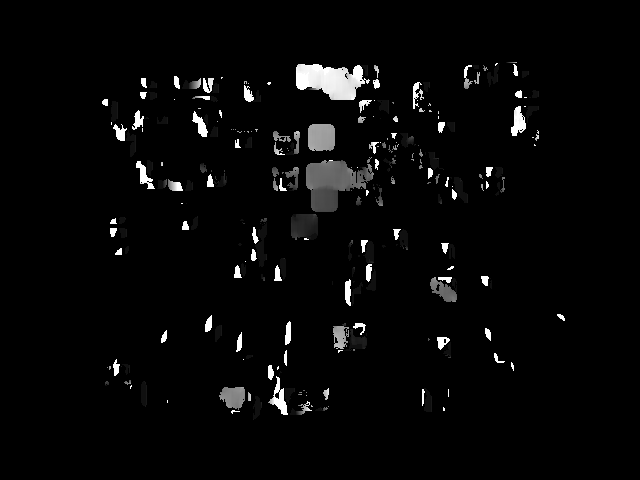

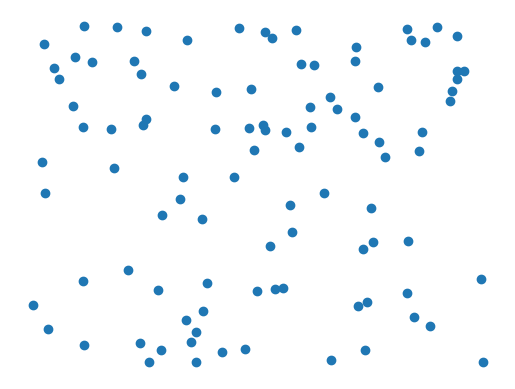

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import io
from google.colab.patches import cv2_imshow
# Generate scatter plot data
n = 100
x = np.random.rand(n)
y = np.random.rand(n)

# Create scatter plot
plt.scatter(x, y)
plt.axis('off')

# Convert plot to image
buf = io.BytesIO()
plt.savefig(buf, format='png')
buf.seek(0)
im = cv2.imdecode(np.frombuffer(buf.getvalue(), np.uint8), -1)
buf.close()

# Rotate image to create stereo pair
h, w = im.shape[:2]
M = cv2.getRotationMatrix2D((w/2, h/2), 5, 1) # Adjust angle and scale as needed
im_r = cv2.warpAffine(im, M, (w, h))

# Display stereo pair as 3D depth map
stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
grayL = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
grayR = cv2.cvtColor(im_r, cv2.COLOR_BGR2GRAY)
disparity = stereo.compute(grayL, grayR)
depth_map = cv2.normalize(disparity, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
cv2_imshow(depth_map)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Anaglyph technique

In [ ]:
from PIL import Image

# Open the left and right stereo images
left_image = Image.open("/content/real_gl1.jpg")
right_image = Image.open("/content/resized3_image.jpg")

# Split the images into their respective color channels
left_red, left_green, left_blue = left_image.split()
right_red, right_green, right_blue = right_image.split()

# Merge the red channel of the left image with the green and blue channels of the right image
merged_image = Image.merge("RGB", (left_red, right_green, right_blue))

# Save the anaglyph image
merged_image.save("anaglyph_image.jpg")

# Erasing a feature of image using python

In [ ]:
from skimage import io
img = io.imread("/content/real_gl1.jpg")


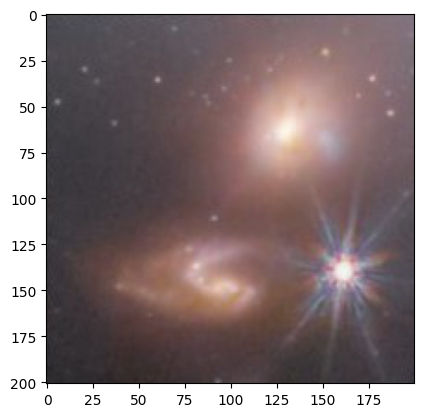

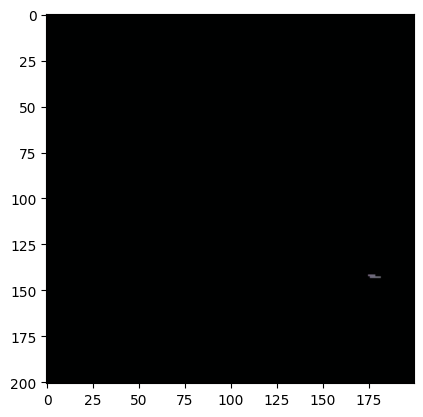

In [ ]:
# Convert the image to grayscale
gray_img = rgb2gray(img)

# Find an appropriate threshold value using Otsu's method
thresh_value = threshold_otsu(gray_img)

# Apply thresholding to the image
binary_img = gray_img > thresh_value

# Label the regions in the binary image
label_img = label(binary_img)

# Select the region based on its area
regions = regionprops(label_img)
target_area = 10  # specify the area of the region you want to erase
mask = np.zeros_like(gray_img)
for region in regions:
    if region.area == target_area:
        mask[label_img == region.label] = 1
        break  # stop after finding the first matching region

# Invert the mask to select the pixels you want to erase
mask = 1 - mask

# Define the color to use for the erased pixels
background_color = (0,1, 1) # Black in RGB

mask = mask.astype(bool)--

# Apply the mask to the image
erased_img = np.copy(img)
erased_img[mask] = background_color

# Display the original image
plt.imshow(img)
plt.show()

# Display the erased image
plt.imshow(erased_img)
plt.show()


In [ ]:
from skimage.filters import threshold_otsu
from skimage.color import rgb2gray
from skimage.measure import label, regionprops
import numpy as np

# Convert the image to grayscale
gray_img = rgb2gray(img)

# Find an appropriate threshold value using Otsu's method
thresh_value = threshold_otsu(gray_img)

# Apply thresholding to the image
binary_img = gray_img > thresh_value

# Label the regions in the binary image
label_img = label(binary_img)

# Find the region that contains the feature of interest
region = regionprops(label_img)[0]


In [ ]:
# Create a mask with the same shape as the image
mask = np.zeros_like(gray_img)

# Set the pixels in the region to 1
mask[label_img == region.label] = 1

# Invert the mask to select the pixels you want to erase
mask = 1 - mask


<ipython-input-16-0614a0784076>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = mask.astype(np.int)
<ipython-input-16-0614a0784076>:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = mask.astype(np.bool)


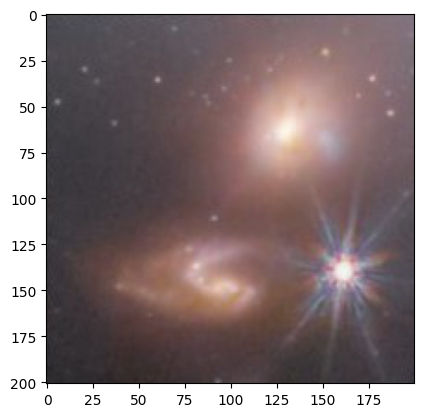

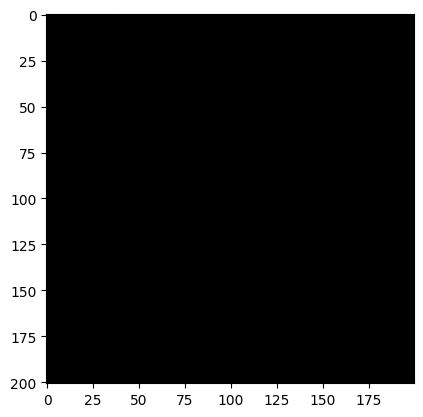

In [ ]:
import matplotlib.pyplot as plt

# Convert the mask to an integer array
mask = mask.astype(np.int)

# Or, convert the mask to a boolean array
mask = mask.astype(np.bool)

# Define the color to use for the erased pixels
background_color = (0, 0, 0) # Black in RGB

# Apply the mask to the image
erased_img = np.copy(img)
erased_img[mask] = background_color

# Display the original image
plt.imshow(img)
plt.show()

# Display the erased image
plt.imshow(erased_img)
plt.show()


In [ ]:

# Convert the mask to an integer array
mask = mask.astype(np.int)

# Or, convert the mask to a boolean array
mask = mask.astype(np.bool)

# Define the color to use for the erased pixels
background_color = (0, 0, 0) # Black in RGB

# Apply the mask to the image
erased_img = np.copy(img)
erased_img[mask] = background_color


<ipython-input-10-397984be2b41>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = mask.astype(np.int)
<ipython-input-10-397984be2b41>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = mask.astype(np.bool)


In [ ]:
io.imsave("new_ers.jpg", erased_img)


<ipython-input-11-a24b54805fbe>:1: UserWarning: new_ers.jpg is a low contrast image
  io.imsave("new_ers.jpg", erased_img)


In [ ]:
from google.colab import files
files.download('new_ers.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 2nd Method

In [ ]:
from PIL import Image

img = Image.open("/content/real_gl1.jpg")


In [ ]:
img_gray = img.convert("L")


In [ ]:
threshold_value = 200 # Adjust this value to achieve the desired result
img_thresholded = img_gray.point(lambda x: 255 if x > threshold_value else 0, "1")


In [ ]:
from PIL import ImageFilter

kernel_size = 3 # Adjust this value to achieve the desired result
kernel = ImageFilter.Kernel((kernel_size, kernel_size), [1] * kernel_size ** 2)
img_opened = img_thresholded.filter(ImageFilter.MinFilter(kernel_size)).filter(ImageFilter.MaxFilter(kernel_size))


In [ ]:
from PIL import Image, ImageOps
img_mask = ImageOps.invert(img_opened)


OSError: ignored

In [ ]:
new_img = Image.new(img.mode, img.size)
new_img.paste(img, mask=img_mask)


In [ ]:
new_img.save("new_image.jpg")


# Code for finding the distance between the 2 centroids

In [ ]:
import cv2
import numpy as np
import math

# Load the image
image = cv2.imread("/content/final2_ins1.jpeg")  # Replace "image.jpg" with the filename of your image

# Define the RGB range for the red dots
red_lower = np.array([0, 0, 200], dtype=np.uint8)
red_upper = np.array([40, 40, 255], dtype=np.uint8)

# Convert the image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Threshold the image to get a binary mask for the red dots
red_mask = cv2.inRange(hsv, red_lower, red_upper)

# Find contours in the binary mask
contours, _ = cv2.findContours(red_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Extract the coordinates of the red dots from the contours
red_coords = []
for contour in contours:
    moments = cv2.moments(contour)
    if moments["m00"] != 0:
        cx = int(moments["m10"] / moments["m00"])
        cy = int(moments["m01"] / moments["m00"])
        red_coords.append((cx, cy))

# Calculate the distance between the two red dots using Pythagorean theorem
if len(red_coords) == 2:
    dot1 = red_coords[0]
    dot2 = red_coords[1]
    distance = math.sqrt((dot2[0] - dot1[0]) ** 2 + (dot2[1] - dot1[1]) ** 2)
    print("Distance between Red Dot 1 and Red Dot 2: ", distance)
else:
    print("Error: Could not identify two red dots in the image.")




Error: Could not identify two red dots in the image.


# RGB values for pure black and white pixels

In [ ]:
from PIL import Image

# Load the image
image_path = "/content/real1_jwst.jpeg"  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to RGB mode
image = image.convert("RGB")

# Define the thresholding values
white_threshold = 250  # Adjust this value to determine what is considered white
black_threshold = 15  # Adjust this value to determine what is considered black

# Get the size of the image
width, height = image.size

# Initialize variables to store maximum RGB values for white and black pixels
white_max_r = white_max_g = white_max_b = 0
black_max_r = black_max_g = black_max_b = 0

# Iterate over each pixel in the image
for x in range(width):
    for y in range(height):
        # Get the RGB values of the pixel
        r, g, b = image.getpixel((x, y))

        # Check if the pixel is close to white
        if r > white_threshold and g > white_threshold and b > white_threshold:
            # Update the maximum RGB values for white pixels
            white_max_r = max(white_max_r, r)
            white_max_g = max(white_max_g, g)
            white_max_b = max(white_max_b, b)

        # Check if the pixel is close to black
        if r < black_threshold and g < black_threshold and b < black_threshold:
            # Update the maximum RGB values for black pixels
            black_max_r = max(black_max_r, r)
            black_max_g = max(black_max_g, g)
            black_max_b = max(black_max_b, b)

# Print the maximum RGB values for white and black pixels
print("Maximum RGB values for white pixels:")
print(f"R: {white_max_r}")
print(f"G: {white_max_g}")
print(f"B: {white_max_b}")

print("Maximum RGB values for black pixels:")
print(f"R: {black_max_r}")
print(f"G: {black_max_g}")
print(f"B: {black_max_b}")




Maximum RGB values for white pixels:
R: 253
G: 253
B: 254
Maximum RGB values for black pixels:
R: 14
G: 14
B: 14


In [ ]:
from PIL import Image

# Load the image
image_path = "/content/resized2_image.jpg"  # Replace with the path to your image
image = Image.open(image_path)

# Convert the image to RGB mode
image = image.convert("RGB")

# Get the size of the image
width, height = image.size

# Define a threshold value for white and black
white_threshold = 150  # Adjust this value as needed
black_threshold = 25  # Adjust this value as needed

# Iterate over each pixel in the image
for x in range(width):
    for y in range(height):
        # Get the RGB values of the pixel
        r, g, b = image.getpixel((x, y))

        # Check if the pixel is close to white
        if r > white_threshold and g > white_threshold and b > white_threshold:
            print(f"Pixel close to white at ({x}, {y}): RGB = ({r}, {g}, {b})")

        # Check if the pixel is close to black
        if r < black_threshold and g < black_threshold and b < black_threshold:
            print(f"Pixel close to black at ({x}, {y}): RGB = ({r}, {g}, {b})")


Pixel close to white at (89, 128): RGB = (206, 155, 151)
Pixel close to white at (89, 129): RGB = (207, 156, 152)
Pixel close to white at (89, 130): RGB = (210, 157, 153)
Pixel close to white at (90, 126): RGB = (209, 155, 153)
Pixel close to white at (90, 127): RGB = (212, 158, 156)
Pixel close to white at (90, 128): RGB = (210, 161, 157)
Pixel close to white at (90, 129): RGB = (211, 162, 157)
Pixel close to white at (90, 130): RGB = (213, 162, 158)
Pixel close to white at (90, 131): RGB = (212, 161, 157)
Pixel close to white at (90, 132): RGB = (212, 159, 153)
Pixel close to white at (91, 124): RGB = (203, 151, 153)
Pixel close to white at (91, 125): RGB = (207, 156, 155)
Pixel close to white at (91, 126): RGB = (211, 160, 159)
Pixel close to white at (91, 127): RGB = (214, 163, 162)
Pixel close to white at (91, 128): RGB = (212, 165, 159)
Pixel close to white at (91, 129): RGB = (213, 166, 160)
Pixel close to white at (91, 130): RGB = (214, 165, 160)
Pixel close to white at (91, 13

# Code for 2 centroids in a single image.

Centroid coordinates: (68, 62)


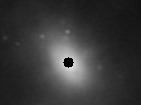

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the galaxy image
galaxy_image = cv2.imread('/content/ins1_gal2.jpeg', cv2.IMREAD_GRAYSCALE)

# Threshold the image to create a binary image
_, thresh = cv2.threshold(galaxy_image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the centroid of the largest contour
if len(contours) > 0:
    max_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(max_contour)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])
    centroid = (centroid_x, centroid_y)
    print("Centroid coordinates: ({}, {})".format(centroid_x, centroid_y))
else:
    print("No contour found.")

# Draw a red circle at the centroid on the original image
cv2.circle(galaxy_image, centroid, 5, (0, 0, 255), -1)

# Display the original image with centroid
cv2_imshow(galaxy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()




Centroid coordinates: (79, 77)


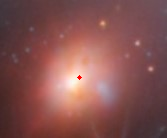

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the galaxy image in color format
galaxy_image = cv2.imread('/content/ins3_gal2.jpeg', cv2.IMREAD_COLOR)

# Convert the image to grayscale
gray_image = cv2.cvtColor(galaxy_image, cv2.COLOR_BGR2GRAY)

# Threshold the grayscale image to create a binary image
_, thresh = cv2.threshold(gray_image, 128, 255, cv2.THRESH_BINARY)

# Find contours in the binary image
contours, _ = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Find the centroid of the largest contour
if len(contours) > 0:
    max_contour = max(contours, key=cv2.contourArea)
    M = cv2.moments(max_contour)
    centroid_x = int(M['m10'] / M['m00'])
    centroid_y = int(M['m01'] / M['m00'])
    centroid = (centroid_x, centroid_y)
    print("Centroid coordinates: ({}, {})".format(centroid_x, centroid_y))
else:
    print("No contour found.")

# Draw a red circle at the centroid on the original image
cv2.circle(galaxy_image, centroid, 3, (0, 0, 255), -1)

# Display the original image with centroid
cv2_imshow(galaxy_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# Minimum norm with rectangular frame

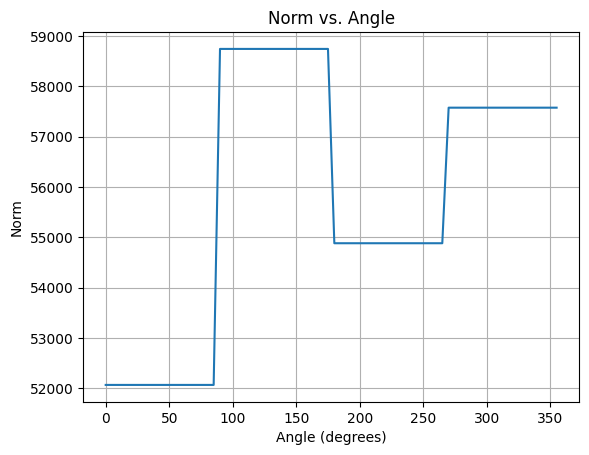

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load your two images as NumPy arrays
image1 = cv2.imread("/content/t11.jpg")  # Replace with the actual path or method to load your first image
image2 = cv2.imread("/content/t22.jpg")  # Replace with the actual path or method to load your second image

# Define the range of angles to rotate the second image (in degrees)
angle_range = np.arange(0, 360, 5)

# Initialize an array to store the norm values
norm_values = []

# Loop through each angle
for angle in angle_range:
    # Rotate the second image by the current angle using NumPy's rotation function
    rotated_image2 = np.rot90(image2, k=angle//90)  # Assumes 90-degree increments, adjust as needed

    # Calculate the norm between the two images using NumPy's norm function
    norm = np.linalg.norm(image1 - rotated_image2)

    # Append the norm value to the norm_values array
    norm_values.append(norm)

# Convert the norm_values array to a NumPy array
norm_values = np.array(norm_values)

# Plot the norm values vs. angles
plt.plot(angle_range, norm_values)
plt.xlabel('Angle (degrees)')
plt.ylabel('Norm')
plt.title('Norm vs. Angle')
plt.grid(True)
plt.show()


# prerquisite converting to 200*200 for rotation

In [ ]:
from PIL import Image

# Open the original image
original_image = Image.open("/content/gal1_3.png")

# Resize the image to desired dimensions
resized_image = original_image.resize((195, 195))

# Save the resized image
resized_image.save("t33.jpg")



# poly curve

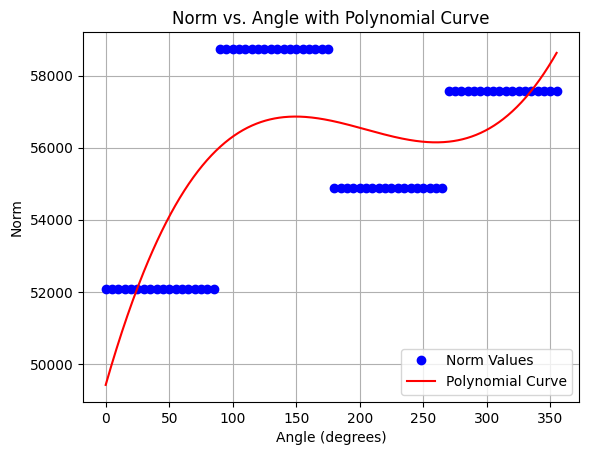

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load your two images as NumPy arrays
image1 = cv2.imread("/content/t11.jpg")  # Replace with the actual path or method to load your first image
image2 = cv2.imread("/content/t22.jpg")  # Replace with the actual path or method to load your second image

# Define the range of angles to rotate the second image (in degrees)
angle_range = np.arange(0, 360, 5)

# Initialize an array to store the norm values
norm_values = []

# Loop through each angle
for angle in angle_range:
    # Rotate the second image by the current angle using NumPy's rotation function
    rotated_image2 = np.rot90(image2, k=angle//90)  # Assumes 90-degree increments, adjust as needed

    # Calculate the norm between the two images using NumPy's norm function
    norm = np.linalg.norm(image1 - rotated_image2)

    # Append the norm value to the norm_values array
    norm_values.append(norm)

# Convert the norm_values array to a NumPy array
norm_values = np.array(norm_values)

# Fit a polynomial curve to the norm values
curve_fit = np.polyfit(angle_range, norm_values, deg=3)  # Change the degree of the polynomial as needed

# Generate new x values for the curve
x_new = np.linspace(angle_range.min(), angle_range.max(), num=500)

# Evaluate the polynomial at the new x values
y_new = np.polyval(curve_fit, x_new)

# Plot the original data points and the polynomial curve
plt.plot(angle_range, norm_values, 'bo', label='Norm Values')
plt.plot(x_new, y_new, 'r-', label='Polynomial Curve')
plt.xlabel('Angle (degrees)')
plt.ylabel('Norm')
plt.title('Norm vs. Angle with Polynomial Curve')
plt.legend()
plt.grid(True)
plt.show()


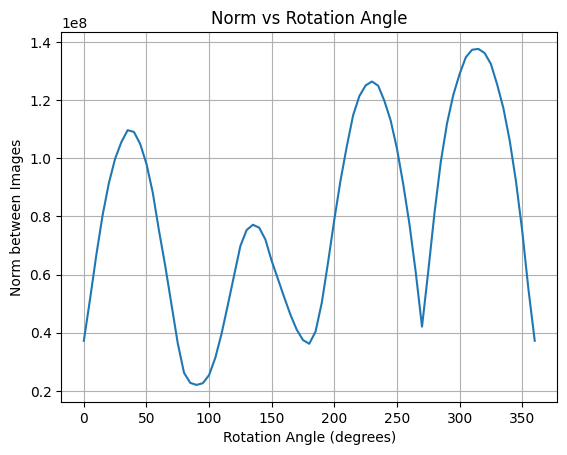

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from PIL import Image

# Load the original and rotated images
original_image = Image.open("/content/t22.jpg").convert("L")  # Convert to grayscale
rotated_image = Image.open("/content/t33.jpg").convert("L")  # Convert to grayscale

# Convert images to NumPy arrays
original_image = np.array(original_image)
rotated_image = np.array(rotated_image)

# Define angles to rotate in degrees
angles = np.arange(0, 361, 5)

# Initialize arrays to store norms and angles
norms = []
rotation_angles = []

# Loop through angles and calculate norms
for angle in angles:
    # Rotate the rotated image
    rotated_image_angle = rotate(rotated_image, angle)

    # Crop the rotated image to the same size as the original image
    min_dim = min(original_image.shape[0], original_image.shape[1])
    rotated_image_angle = rotated_image_angle[:min_dim, :min_dim]

    # Calculate the norm between the original and rotated images
    diff = original_image.astype(np.int64) - rotated_image_angle.astype(np.int64)
    norm = np.sum(diff[:, :] ** 2)

    # Store the norm and rotation angle
    norms.append(norm)
    rotation_angles.append(angle)

# Convert lists to NumPy arrays
norms = np.array(norms)
rotation_angles = np.array(rotation_angles)

# Plot the norm versus rotation angle
plt.plot(rotation_angles, norms)
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Norm between Images')
plt.title('Norm vs Rotation Angle')
plt.grid(True)
plt.show()


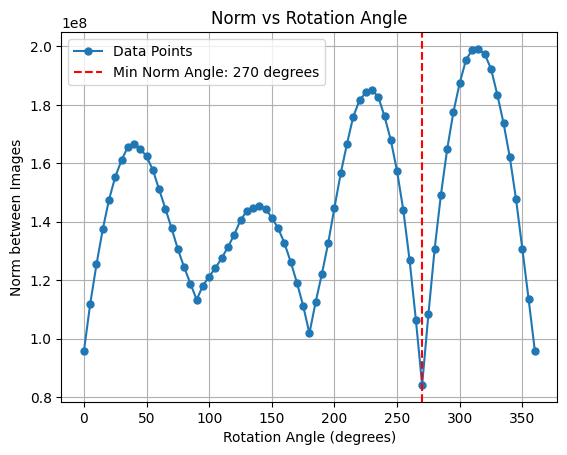

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import rotate
from PIL import Image

# Load the original and rotated images
original_image = Image.open("/content/t11.jpg").convert("L")  # Convert to grayscale
rotated_image = Image.open("/content/t33.jpg").convert("L")  # Convert to grayscale

# Convert images to NumPy arrays
original_image = np.array(original_image)
rotated_image = np.array(rotated_image)

# Define angles to rotate in degrees
angles = np.arange(0, 361, 5)

# Initialize arrays to store norms and angles
norms = []
rotation_angles = []

# Loop through angles and calculate norms
for angle in angles:
    # Rotate the rotated image
    rotated_image_angle = rotate(rotated_image, angle)

    # Crop the rotated image to the same size as the original image
    min_dim = min(original_image.shape[0], original_image.shape[1])
    rotated_image_angle = rotated_image_angle[:min_dim, :min_dim]

    # Calculate the norm between the original and rotated images
    diff = original_image.astype(np.int64) - rotated_image_angle.astype(np.int64)
    norm = np.sum(diff[:, :] ** 2)

    # Store the norm and rotation angle
    norms.append(norm)
    rotation_angles.append(angle)

# Convert lists to NumPy arrays
norms = np.array(norms)
rotation_angles = np.array(rotation_angles)

# Find the angle with the minimum norm
min_norm_index = np.argmin(norms)
min_norm_angle = rotation_angles[min_norm_index]

# Plot the norm versus rotation angle with markers
plt.plot(rotation_angles, norms, marker='o', markersize=5, label='Data Points')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Norm between Images')
plt.title('Norm vs Rotation Angle')
plt.grid(True)
plt.legend()

# Add a vertical line for the angle with the minimum norm
plt.axvline(min_norm_angle, color='red', linestyle='--', label=f'Min Norm Angle: {min_norm_angle} degrees')
plt.legend()

plt.show()


# Rotating the image to form stereo pair

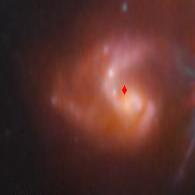

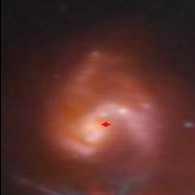

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load the image
image = cv2.imread('/content/t33.jpg', cv2.IMREAD_COLOR)

# Get the image size
height, width = image.shape[:2]

# Define the rotation angle in degrees
angle = 270

# Calculate the rotation matrix
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), angle, 1)

# Apply the rotation to the image
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the original and rotated images
cv2_imshow(image)
cv2_imshow(rotated_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


# 3D random plot

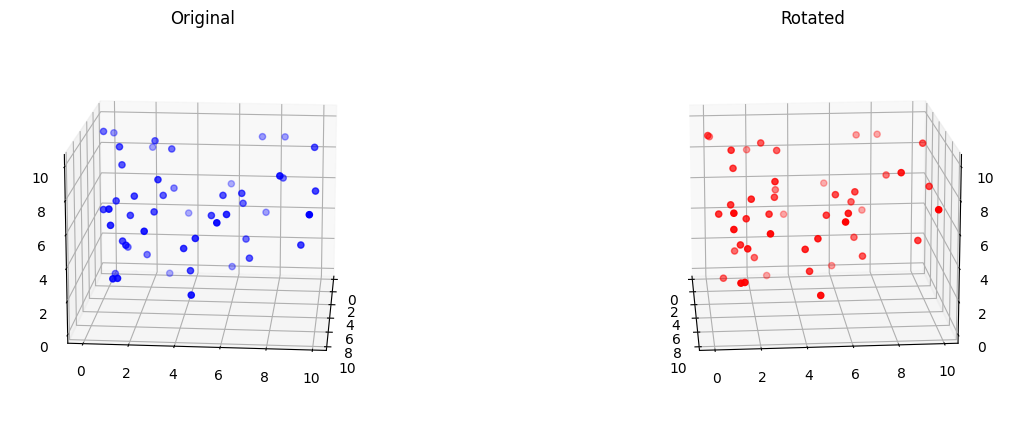

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create random data for the scatter plot
np.random.seed(0)
x = np.random.rand(50) * 10
y = np.random.rand(50) * 10
z = np.random.rand(50) * 10

# Create the first subplot for the original plot
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, c='b', marker='o')
ax1.view_init(elev=15, azim=5)
ax1.set_title('Original')

# Create the second subplot for the rotated plot
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z, c='r', marker='o')
ax2.view_init(elev=15, azim=-5)
ax2.set_title('Rotated')

# Adjust the layout of subplots
plt.subplots_adjust(left=0.05, right=0.95, wspace=0.3)

# Show the stereo pair plots
plt.show()



another 3d scatter with depth map

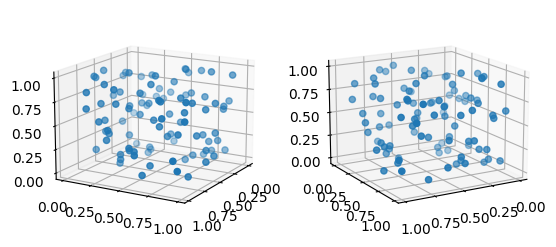

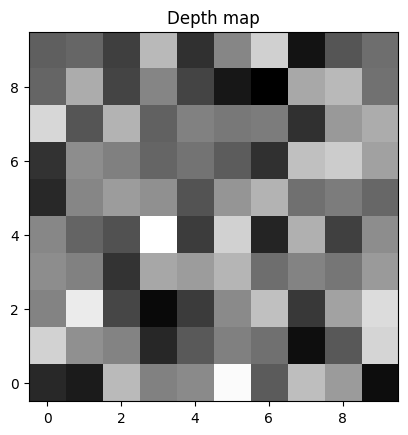

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Generate some random 3D data
np.random.seed(42)
n_points = 100
x = np.random.rand(n_points)
y = np.random.rand(n_points)
z = np.random.rand(n_points)

# Create the initial 3D scatter plot
fig = plt.figure()
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z)

# Rotate the plot
ax1.view_init(elev=15, azim=30)

# Create the stereo pair by generating a second plot with a slightly different angle
ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(x, y, z)
ax2.view_init(elev=15, azim=60)

# Get the projection matrix for the two plots
proj1 = ax1.get_proj()
proj2 = ax2.get_proj()

# Project the data onto the 2D plane
proj_data1 = proj1.dot(np.vstack([x, y, z, np.ones(n_points)]))
x1, y1, _ = proj_data1[:3,:]
proj_data2 = proj2.dot(np.vstack([x, y, z, np.ones(n_points)]))
x2, y2, _ = proj_data2[:3,:]

# Create a depth map by subtracting the x-coordinates of the second plot from the first plot
depth_map = x1 - x2
depth_map = depth_map.reshape((10, 10))

# Show the plots and the depth map
fig = plt.figure()
ax3 = fig.add_subplot(111)
ax3.imshow(depth_map.T, cmap='gray', origin='lower')
ax3.set_title('Depth map')
plt.show()






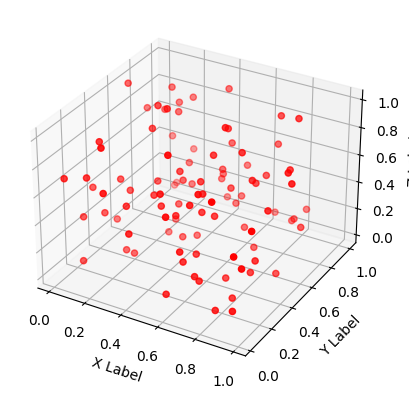

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()


In [ ]:
ax.view_init(elev=6, azim=0)


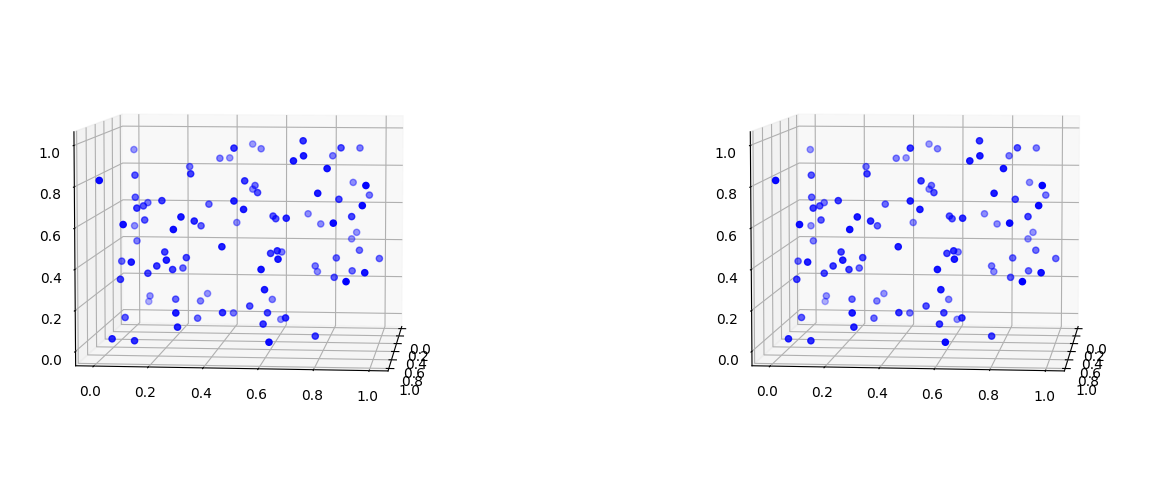

In [ ]:
fig = plt.figure(figsize=(16, 6))
ax1 = fig.add_subplot(121, projection='3d')
ax2 = fig.add_subplot(122, projection='3d')

x = np.random.rand(100)
y = np.random.rand(100)
z = np.random.rand(100)

ax1.scatter(x, y, z, c='b', marker='o')
ax2.scatter(x, y, z, c='b', marker='o')

ax1.view_init(elev=6, azim=0)
ax2.view_init(elev=6, azim=0)

plt.show()


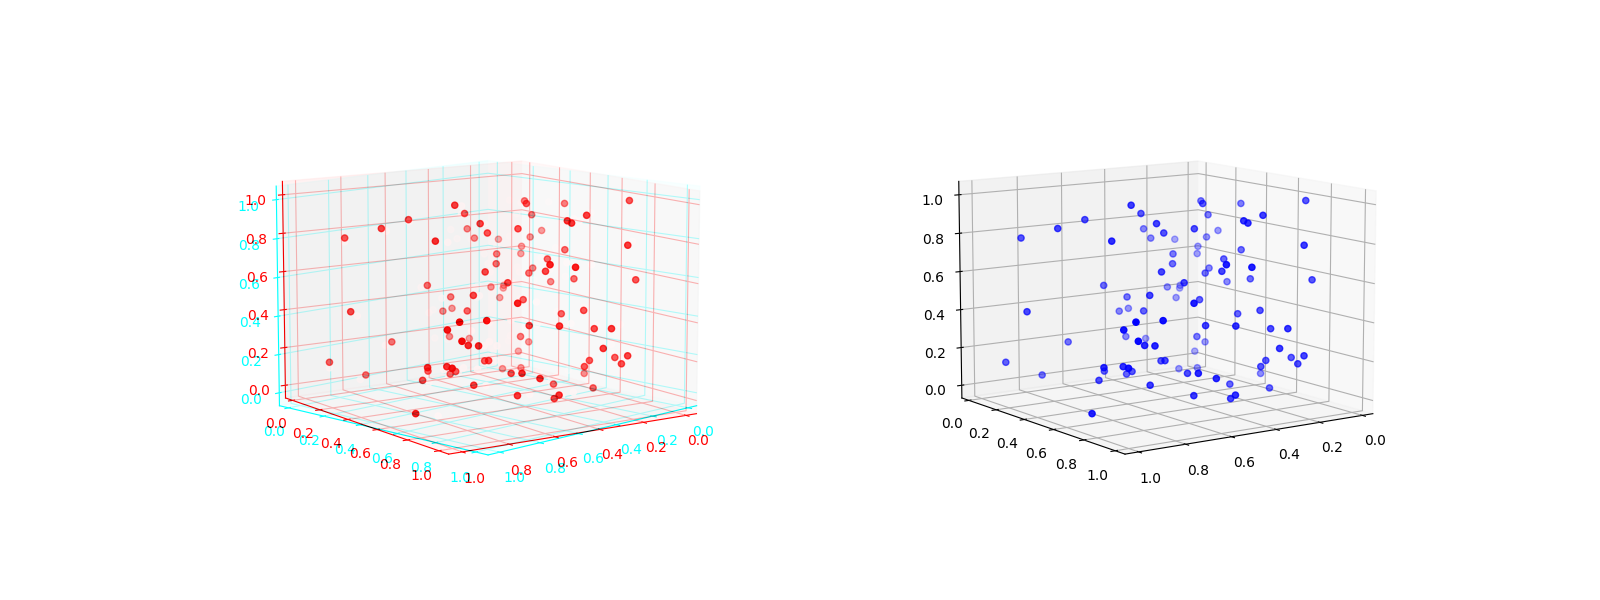

In [ ]:
from PIL import Image

fig.canvas.draw()
img1 = np.array(fig.canvas.renderer.buffer_rgba())

ax1.view_init(elev=10, azim=55)
fig.canvas.draw()
img2 = np.array(fig.canvas.renderer.buffer_rgba())

image = np.zeros((img1.shape[0], img1.shape[1], 3), dtype=np.uint8)
image[:, :, 0] = img1[:, :, 0]
image[:, :, 1] = img2[:, :, 1]
image[:, :, 2] = img2[:, :, 2]

anaglyph_image = Image.fromarray(image)
anaglyph_image.show()


# Difference image and histogram equalization

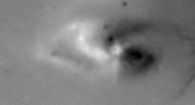

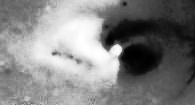

True

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
# Load the image
img = cv2.imread('/content/diff_img.jpg', cv2.IMREAD_GRAYSCALE)

# Perform histogram equalization
eq_img = cv2.equalizeHist(img)

# Display the original and equalized images
cv2_imshow(img)
cv2_imshow(eq_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the equalized image
cv2.imwrite('equalized.jpg', eq_img)



# new code for diff image

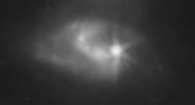

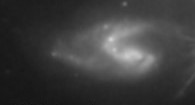

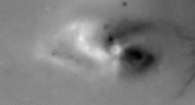

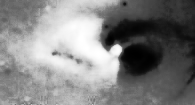

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Load two images
image1 = cv2.imread('/content/ins1_gal1.jpeg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('/content/ins3_gal1.jpeg', cv2.IMREAD_GRAYSCALE)

# Ensure both images have the same size
image1 = cv2.resize(image1, (image2.shape[1], image2.shape[0]))

# Calculate the difference image
diff_image = image1.astype(np.float32) - image2.astype(np.float32)

# Add 1/2 of the maximum value to each pixel
diff_image += 128

# Clip pixel values to [0, 255]
diff_image = np.clip(diff_image, 0, 255)

# Convert to uint8 data type
diff_image = diff_image.astype(np.uint8)

# Ensure that no pixel value is less than 0 or greater than 255
diff_image[diff_image < 0] = 0
diff_image[diff_image > 255] = 255

# Perform histogram equalization
eq_diff_image = cv2.equalizeHist(diff_image)

# Convert equalized difference image to color format
eq_diff_image_color = cv2.cvtColor(eq_diff_image, cv2.COLOR_GRAY2BGR)

# Display the original images and the difference image
cv2_imshow(image1)
cv2_imshow(image2)
cv2_imshow(diff_image)
cv2_imshow(eq_diff_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

# Save the difference image
cv2.imwrite('diff_img.jpg', diff_image)


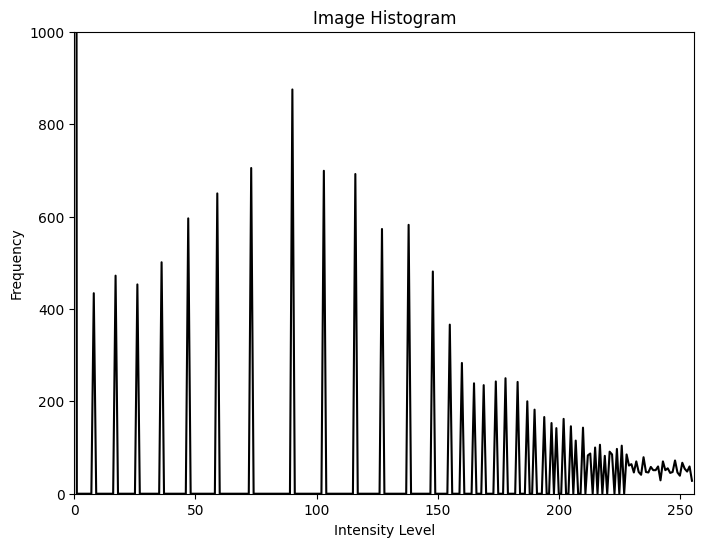

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/eq_2i.png', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.xlim([0, 256])
plt.ylim([0, 1000])

plt.show()



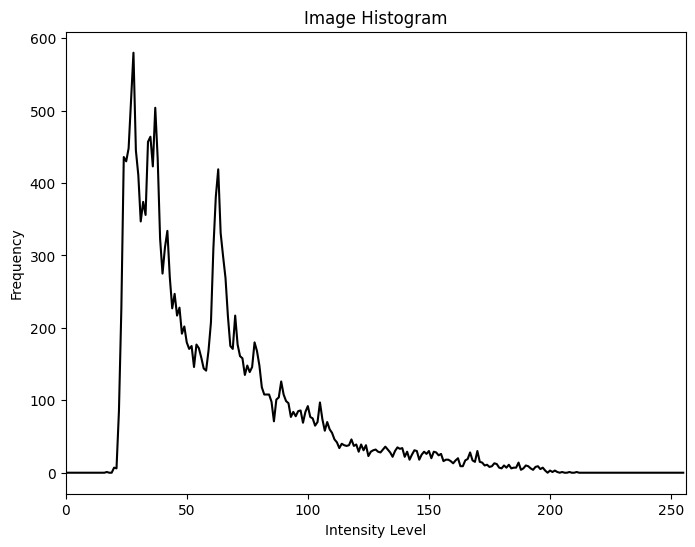

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/ins3_gal1.jpeg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.show()

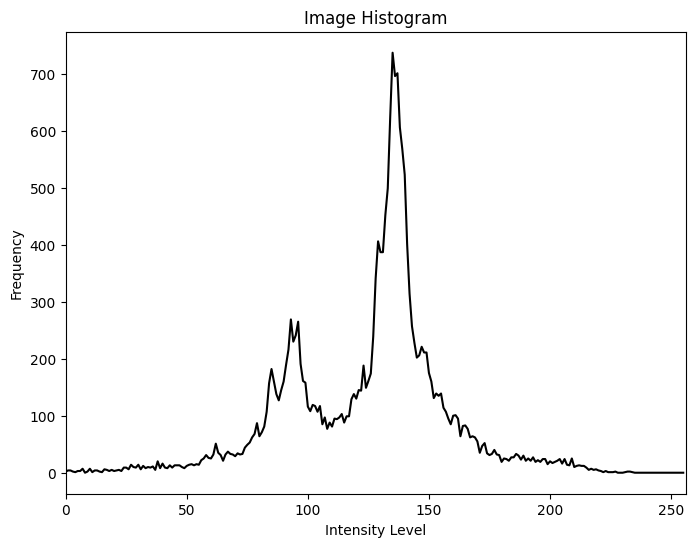

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Load an image
image = cv2.imread('/content/diff_img.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate the histogram
histogram = cv2.calcHist([image], [0], None, [256], [0, 256])

# Plot the histogram
plt.figure(figsize=(8, 6))
plt.plot(histogram, color='black')
plt.title('Image Histogram')
plt.xlabel('Intensity Level')
plt.ylabel('Frequency')
plt.xlim([0, 256])

plt.show()

In [ ]:
from PIL import Image

# Open the original image
original_image1 = Image.open("/content/ins1_gal1.jpeg")
original_image2 = Image.open("/content/ins2_gal1.jpeg")
original_image3 = Image.open("/content/ins3_gal1.jpeg")
# Resize the image to desired dimensions
resized_image1 = original_image1.resize((195, 115))
resized_image2 = original_image2.resize((195, 115))
resized_image3 = original_image3.resize((195, 115))
# Save the resized image
resized_image1.save("resize1.jpg")
resized_image2.save("resize2.jpg")
resized_image3.save("resize3.jpg")

Image matching Error between image 1 and image 2: 9.31803790412486
Image matching Error between image 1 and image 3: 52.59540691192865
Image matching Error between image 2 and image 3: 97.04517279821627


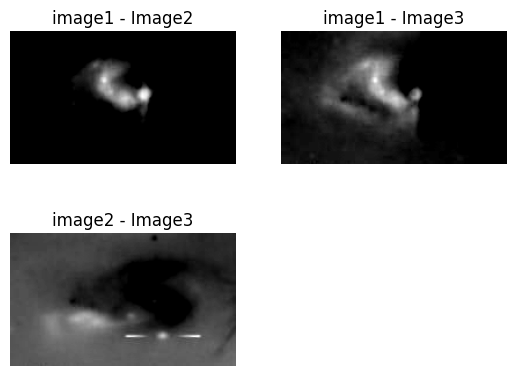

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img1 = cv2.imread('/content/resize1.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
h, w = img1.shape

img2 = cv2.imread('/content/resize2.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
img3 = cv2.imread('/content/resize3.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY)

def error(img1, img2):
   diff = cv2.subtract(img1, img2)
   err = np.sum(diff**2)
   mse = err/(float(h*w))
   msre = np.sqrt(mse)
   return mse, diff

match_error12, diff12 = error(img1, img2)
match_error13, diff13 = error(img1, img3)
match_error23, diff23 = error(img2, img3)

print("Image matching Error between image 1 and image 2:",match_error12)
print("Image matching Error between image 1 and image 3:",match_error13)
print("Image matching Error between image 2 and image 3:",match_error23)

plt.subplot(221), plt.imshow(diff12,'gray'),plt.title("image1 - Image2"),plt.axis('off')
plt.subplot(222), plt.imshow(diff13,'gray'),plt.title("image1 - Image3"),plt.axis('off')
plt.subplot(223), plt.imshow(diff23,'gray'),plt.title("image2 - Image3"),plt.axis('off')
plt.show()

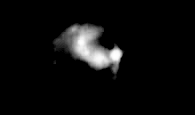

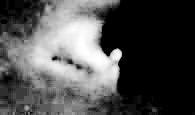

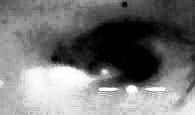

In [ ]:
from google.colab.patches import cv2_imshow
diff12_eq = cv2.equalizeHist(diff12)
diff13_eq = cv2.equalizeHist(diff13)
diff23_eq = cv2.equalizeHist(diff23)
cv2_imshow(diff12_eq)
cv2_imshow(diff13_eq)
cv2_imshow(diff23_eq)